# import necessary library

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels as sm
import yfinance as yf
from datetime import datetime

# download dataset

In [50]:
awal = datetime(year=2018, month=1, day=1)
akhir = datetime(year=2023, month=1, day=1)

In [51]:
stock = yf.download('BBRI.JK', start=awal, end=akhir,)
stock.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,3640.0,3640.0,3640.0,3640.0,2935.489502,0
2018-01-02,3690.0,3720.0,3610.0,3630.0,2927.425049,91127100
2018-01-03,3630.0,3630.0,3560.0,3610.0,2911.295654,70148700
2018-01-04,3610.0,3610.0,3460.0,3550.0,2862.908691,156406300
2018-01-05,3550.0,3590.0,3520.0,3590.0,2895.166748,87095600


In [58]:
dataset = pd.DataFrame(stock['Adj Close'])
dataset.head(10)

,Adj Close
Date,
2018-01-01,2935.489502
2018-01-02,2927.425049
2018-01-03,2911.295654
2018-01-04,2862.908691
2018-01-05,2895.166748
2018-01-08,2895.166748
2018-01-09,2879.037842
2018-01-10,2846.779785
2018-01-11,2854.843994


# explarotary data analysis

In [59]:
def adjust():
    plt.figure(figsize=(16, 5), dpi=300)

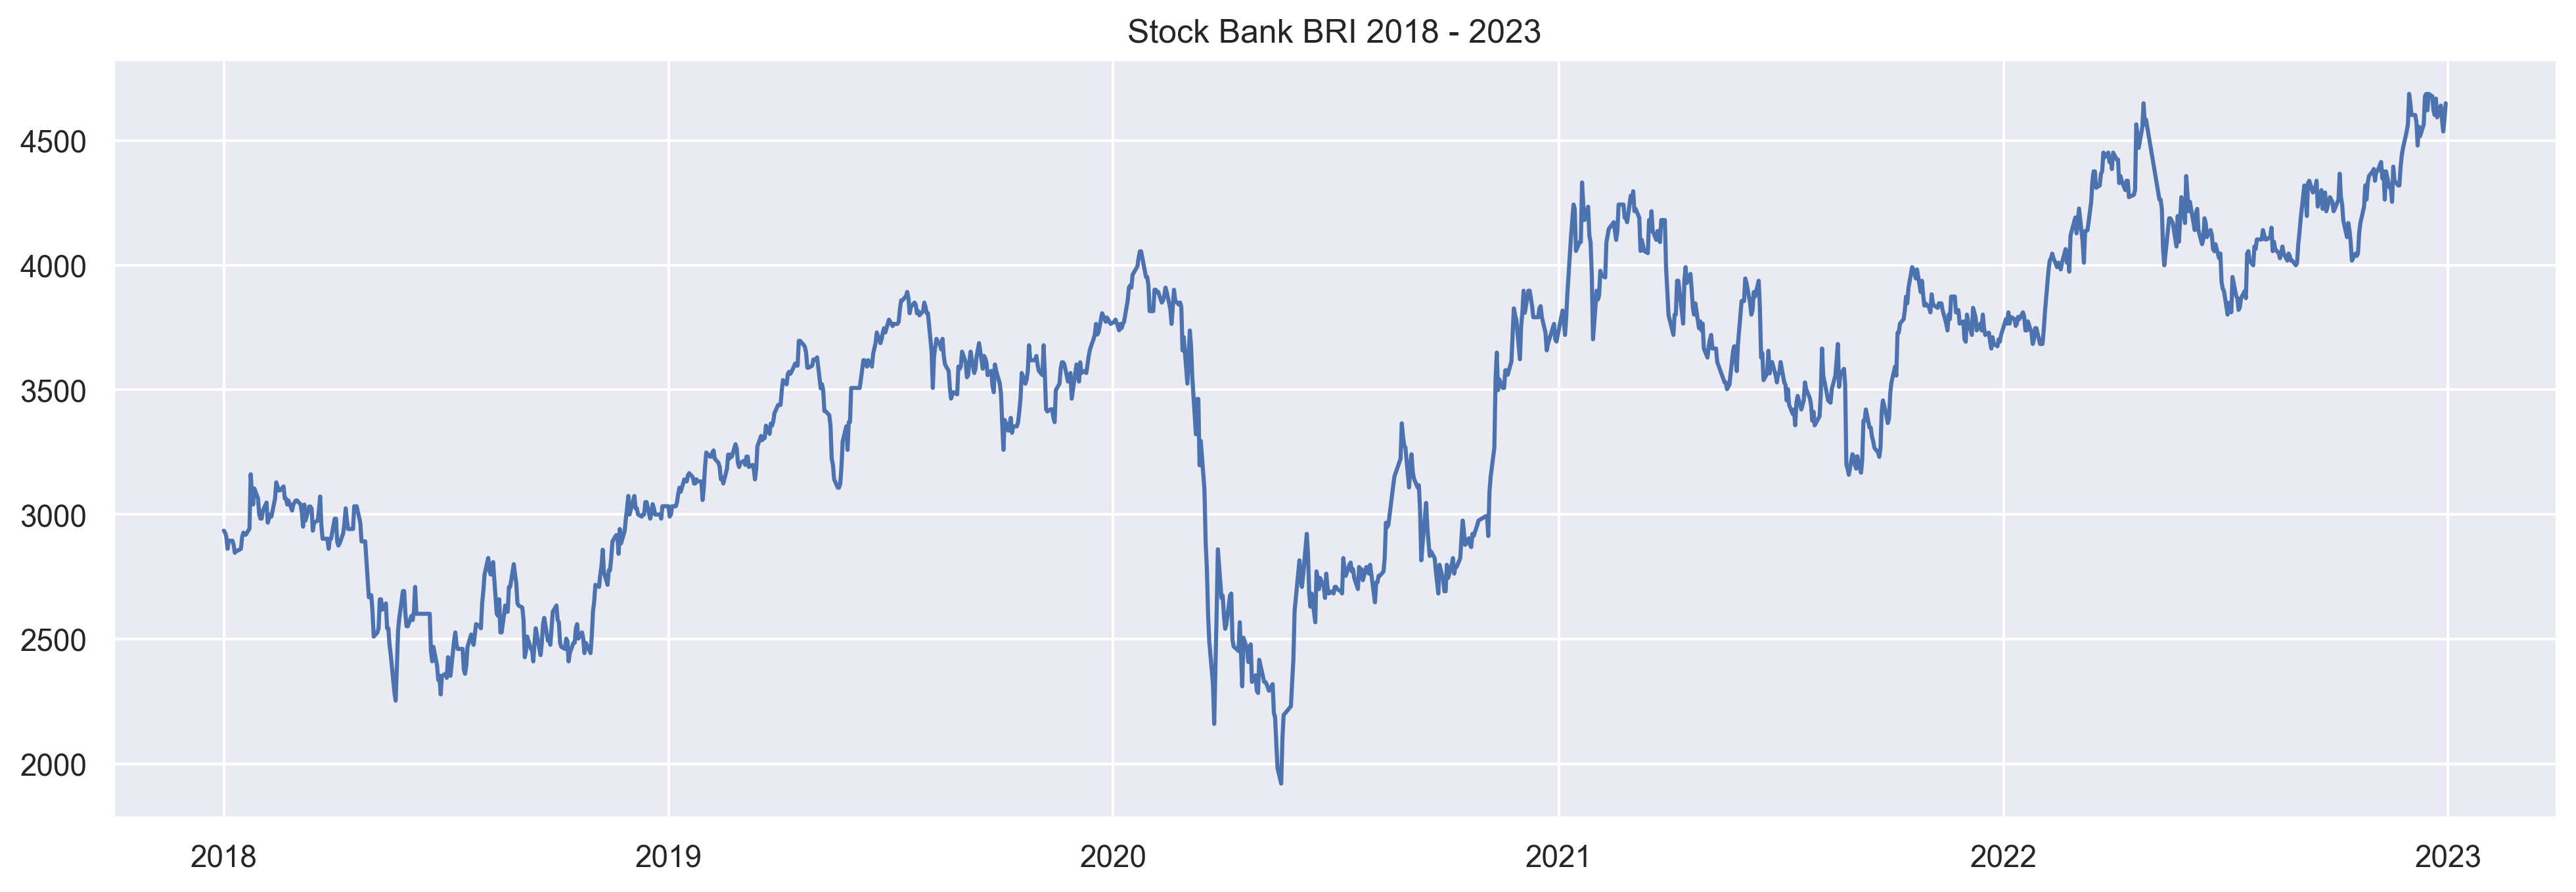

In [121]:
adjust()
plt.plot(dataset.index, dataset['Adj Close'])
plt.title('Stock Bank BRI 2018 - 2023')
plt.show()

In [119]:
stat, p, lag, obs, critical, t = sm.tsa.stattools.adfuller(dataset)
if p > 0.05:
    print('data probably not stationary')
else:
    print('data probably stationary')
print(f"""
statictical: {stat}
critical value: {critical}""")

data probably not stationary

statictical: -1.6084219433521583
critical value: {'1%': -3.4355964295197743, '5%': -2.863856825923603, '10%': -2.5680035060041626}


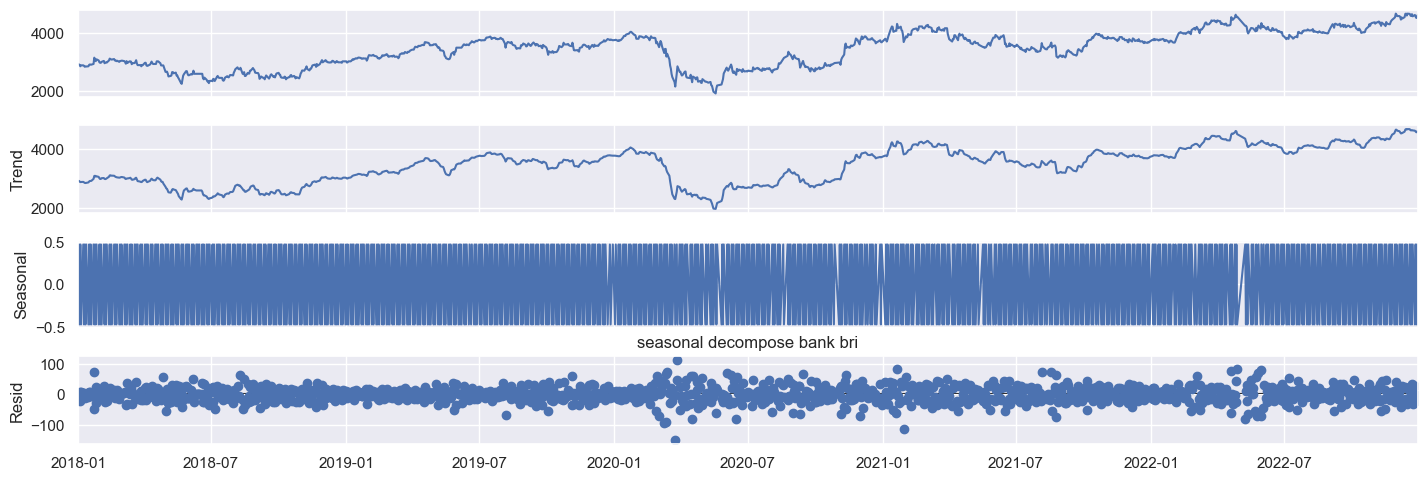

In [122]:
sm.tsa.seasonal.seasonal_decompose(dataset, model='additive', period=2).plot().set_size_inches(w=16, h=5)
plt.title('seasonal decompose bank bri')
plt.show()

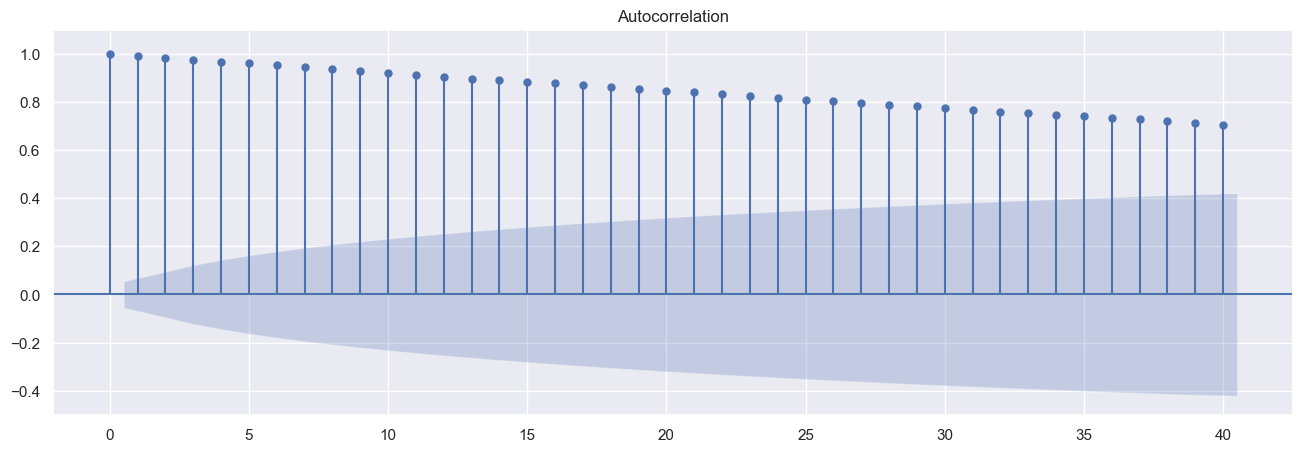

In [133]:
sm.api.graphics.tsa.plot_acf(dataset, lags=40).set_size_inches(w=16, h=5)
plt.ylim(-0.5, 1.1)
plt.show()

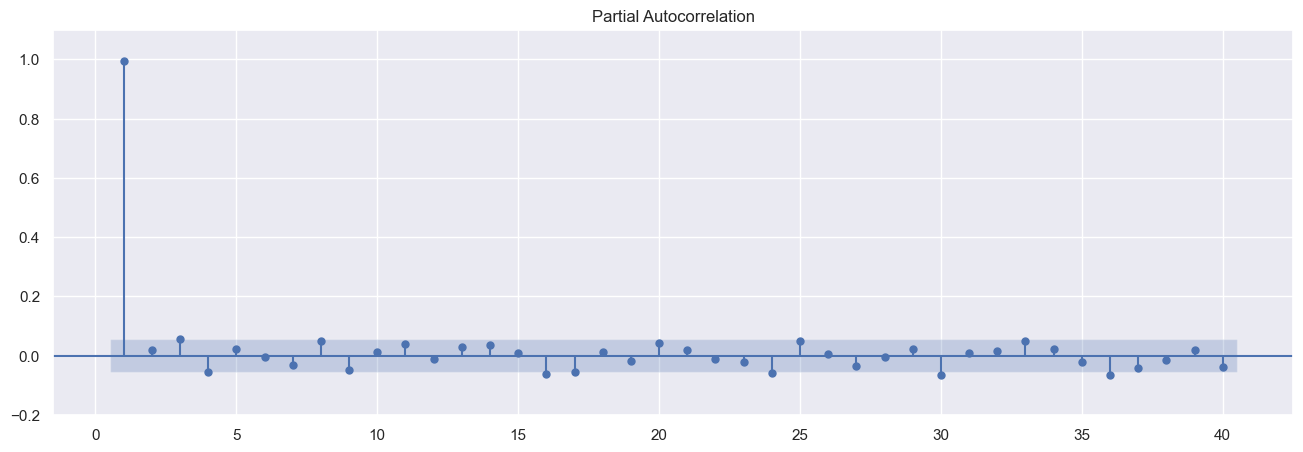

In [132]:
sm.api.graphics.tsa.plot_pacf(dataset, lags=40, alpha=0.05, zero=False, method=('ols')).set_size_inches(w=16, h=5)
plt.ylim(-0.2, 1.1)
plt.show()